In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version = 1)
X, y = mnist["data"], mnist["target"]

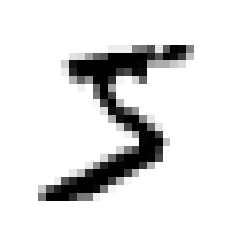

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

r_digit = X[0]
r_digit_image = r_digit.reshape(28,28)
plt.imshow(r_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [3]:
import numpy as np
y = y.astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [82]:
y_train_5 = (y_train == 5)
y_test = (y_test == 5)

In [83]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [84]:
sgd_clf.predict([X[0]])

array([ True])

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/home/piotr/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8787
0.8495
0.85815


In [86]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [87]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [95]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_5, y_train_pred)
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [96]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [100]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([2164.22030239])

In [101]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [102]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

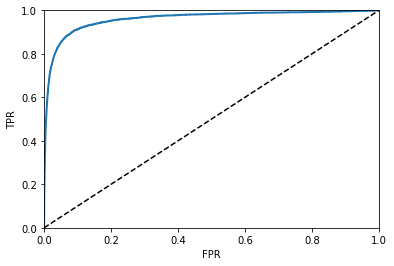

In [104]:
def plot_roc_curve (fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0, 1], "k--")
    plt.axis([0,1, 0,1])
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    
plot_roc_curve(fpr, tpr)
plt.show()

In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [108]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[0]])

array([3], dtype=uint8)

In [109]:
# Exercises

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_neighbors":[3,4,5]},
    {"weights": ["uniform", "distance"]}]           
KNC = KNeighborsClassifier()

grid_search = GridSearchCV(KNC, param_grid, cv = 5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 1147.2min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5]},
                         {'weights': ['uniform', 'distance']}],
             verbose=3)

In [6]:
grid_search.best_params_

{'weights': 'distance'}

In [7]:
grid_search.best_score_

0.9704166666666667